In [1]:
import numpy as np
from motionless import CenterMap
import skimage.io
from skimage import color
from PIL import Image
import urllib.request
import io
from skimage import exposure
from skimage.color import rgb2gray

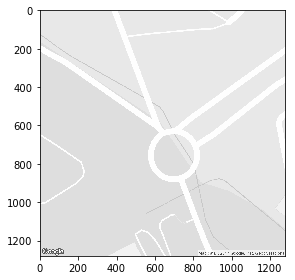

In [2]:
# lat=38.6038808, lon=-3.4694234
# lat=38.0092846, lon=-4.3255341
# {'lat': 37.9039882, 'lng': -4.7740557}
cmap = CenterMap(lat=37.9039882, lon=-4.7740557, size_x=640, size_y=640, zoom=18, scale=2)
URL = cmap.generate_url()
URL += "&style=feature:all|element:labels|visibility:off"

with urllib.request.urlopen(URL) as url:
    f = io.BytesIO(url.read())

img = np.array(Image.open(f).convert("RGB"))
img = rgb2gray(img)
skimage.io.imshow(img)
skimage.io.show()


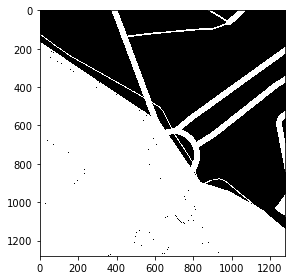

In [3]:
threshold = 0.909
mask = (img > threshold - .001) & (img < threshold + .001)
mask = np.invert(mask)
skimage.io.imshow(mask)
skimage.io.show()

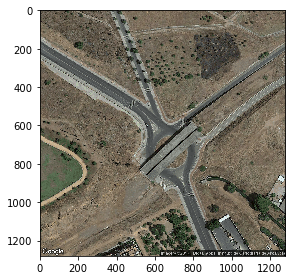

In [4]:
cmap_sat = CenterMap(lat=37.9039882, lon=-4.7740557, maptype='satellite', size_x=640, size_y=640, zoom=18, scale=2)
img_sat = skimage.io.imread(cmap_sat.generate_url())
skimage.io.imshow(img_sat)
skimage.io.show()

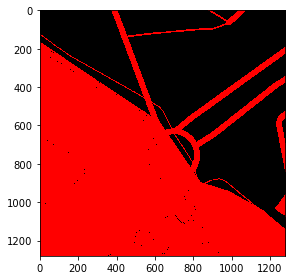

In [5]:
color_mask = np.zeros(img_sat.shape)
color_mask[mask] = [255, 0, 0]
skimage.io.imshow(exposure.rescale_intensity(color_mask))
skimage.io.show()

In [6]:
alpha = .6
blended = alpha * img_sat + (1 - alpha) * color_mas
skimage.io.imshow(exposure.rescale_intensity(blended))
skimage.io.show()

NameError: name 'color_mas' is not defined